# Data Preparation Steps for Fruit Classification

Dataset contains selected 10 fruits labels taken from [Fruits 360](https://www.kaggle.com/moltean/fruits)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.datasets import load_files

from keras.utils import np_utils
from keras.preprocessing.image import array_to_img, img_to_array, load_img

### 1. Load Dataset

In [ ]:
train_dir = 'fruits-360_dataset/fruits-360/Training0'
test_dir = 'fruits-360_dataset/fruits-360/Testing0'

In [ ]:
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

In [5]:
X_train, y_train, target_labels = load_dataset(train_dir)
X_test, y_test, _ = load_dataset(test_dir)
print("Data Loaded")

Data Loaded


### 2. Exploring Dataset 

In [ ]:
# print('Training set size', X_train.shape)
print('Testing set size', X_test.shape)

In [7]:
X_test.shape

(1795,)

In [8]:
total_class = len(np.unique(y_train))
total_class

10

In [9]:
print(y_train[0:10])

[7 3 9 8 4 2 7 3 4 9]


### 3. Convert Labels (Classes) into Categorical

In [10]:
y_train = np_utils.to_categorical(y_train, total_class)
y_test = np_utils.to_categorical(y_test, total_class)

print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [11]:
X_test, X_valid = X_test[750:], X_test[:750]
y_test, y_valid = y_test[750:], y_test[:750]

print(X_test.shape, X_valid.shape)
print(y_test.shape, y_valid.shape)

(1045,) (750,)
(1045, 10) (750, 10)


In [12]:
X_train[0]

'fruits-360_dataset/fruits-360/Training0\\Pepper Yellow\\98_100.jpg'

In [24]:
print(target_labels)
print(X_train[0])
print(y_train[0])

['Apple Red 1' 'Avocado' 'Banana' 'Blueberry' 'Cauliflower' 'Grape White'
 'Onion Red' 'Pepper Yellow' 'Potato Sweet' 'Tomato 3']
[[[1.         0.99607843 0.9843137 ]
  [0.9882353  1.         1.        ]
  [0.972549   1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         0.99215686 1.        ]
  [0.99607843 1.         1.        ]
  [0.9764706  1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99607843 1.         1.        ]
  [1.         1.         0.99215686]
  [1.         1.         0.9843137 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.    

### 4. Convert Image into Array

In [14]:
def convert_image_to_array(files):
    array_img = []
    for file in files:
        array_img.append(img_to_array(load_img(file)))
    return np.array(array_img)

In [15]:
X_train = convert_image_to_array(X_train)
X_valid = convert_image_to_array(X_valid)
X_test = convert_image_to_array(X_test)

print(X_train.shape, X_valid.shape, X_test.shape)

(5367, 100, 100, 3) (750, 100, 100, 3) (1045, 100, 100, 3)


In [16]:
X_train[0]

array([[[255., 254., 251.],
        [252., 255., 255.],
        [248., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 253., 255.],
        [254., 255., 255.],
        [249., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 255., 255.],
        [255., 255., 253.],
        [255., 255., 251.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

### Normalizing or rescaling data into [0,1]

In [17]:
X_train = X_train.astype('float32')/255
X_valid = X_valid.astype('float32')/255
X_test = X_test.astype('float32')/255

In [18]:
X_train[0]

array([[[1.        , 0.99607843, 0.9843137 ],
        [0.9882353 , 1.        , 1.        ],
        [0.972549  , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 0.99215686, 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.9764706 , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.99607843, 1.        , 1.        ],
        [1.        , 1.        , 0.99215686],
        [1.        , 1.        , 0.9843137 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

### 2. Visualization

#### Some image visualization to check that the data preparation is going well.

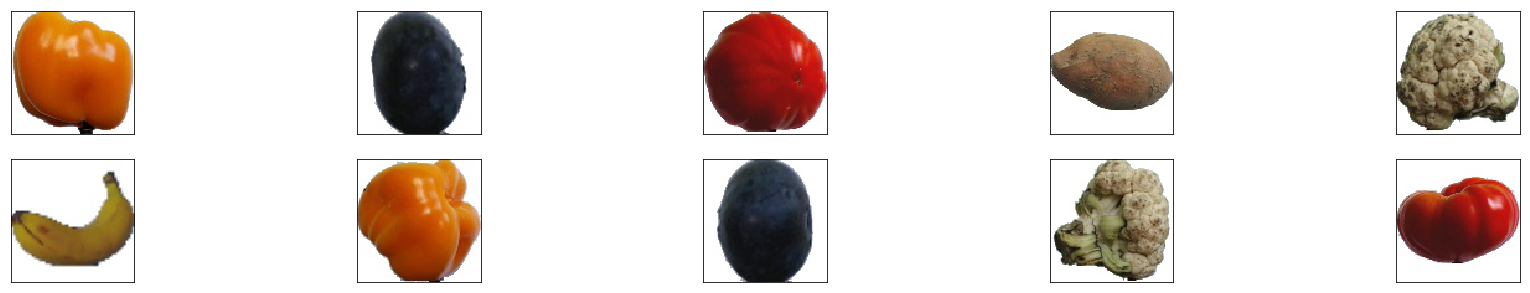

In [25]:
fig = plt.figure(figsize =(30,5))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

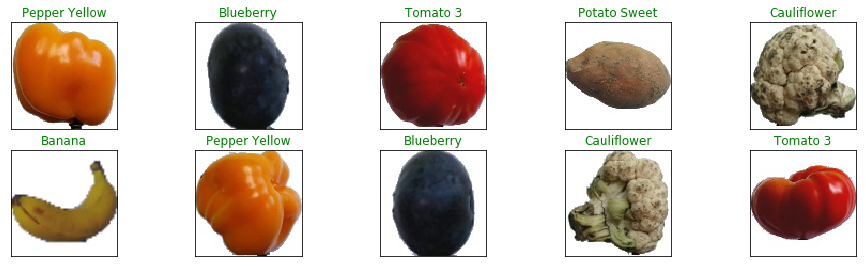

In [26]:
fig = plt.figure(figsize=(16,9))
for i in range(10):
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])    
    ax.imshow(np.squeeze(X_train[i]))
    true_idx = np.argmax(y_train[i])
    ax.set_title("{}".format(target_labels[true_idx]), color="green")